<a href="https://colab.research.google.com/github/jatoogunhyo/dart_disclosure/blob/main/DART_API%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DART API 실습
## opendartreader 패키지에 대한 설명은 아래 사이트에서 확인가능하며,
## 내용이 심플하므로 하나씩 따라해 볼 수 있다.
## https://nbviewer.org/github/FinanceData/OpenDartReader/blob/master/docs/OpenDartReader_reference_manual.ipynb

In [1]:
# Open Dart Reader 패키지 설치하기
!pip install OpenDartReader

In [2]:
#필요한 패키지를 로드
import OpenDartReader
import pandas as pd
import requests
from time import sleep

In [3]:
#opendartreader를 사용하기 위한 정보를 입력하는 과정
api_key = '8e2ea4f554fb04049a1dc04f21b28710c8c6c887'
dart = OpenDartReader(api_key)

In [4]:
#특정기간의 공시목록을 불러오기
#API에서는 종목을 지정하지 않고 불러올 수 있는 기간은 3개월이 최대임
#따라서 3개월 단위로 끊은 날짜 세트를 입력한다

from datetime import datetime, timedelta

def generate_quarterly_date_ranges(start_year, end_year):
    start_list = []
    end_list = []

    for year in range(start_year, end_year + 1):
        for quarter in range(4):
            start_month = quarter * 3 + 1
            start_date = datetime(year, start_month, 1)

            if quarter == 3:  # 4분기의 경우
                end_date = datetime(year + 1, 1, 1) - timedelta(days=1)
            else:
                end_month = start_month + 2
                end_date = datetime(year, end_month + 1, 1) - timedelta(days=1)

            start_list.append(start_date.strftime('%Y%m%d'))
            end_list.append(end_date.strftime('%Y%m%d'))

    return start_list, end_list

# 2022년부터 2023년까지 분기별 날짜 생성
start_list, end_list = generate_quarterly_date_ranges(2022, 2023)

# 결과 출력
for start, end in zip(start_list, end_list):
    print(f"Start: {start}, End: {end}")

Start: 20220101, End: 20220331
Start: 20220401, End: 20220630
Start: 20220701, End: 20220930
Start: 20221001, End: 20221231
Start: 20230101, End: 20230331
Start: 20230401, End: 20230630
Start: 20230701, End: 20230930
Start: 20231001, End: 20231231


### DART API로 공시수집하기

In [5]:
#비어있는 데이터프레임을 만들고
#만들어진 날짜세트를 이용하여, 공시내역을 각각 수집하여 합친다
disclosure = pd.DataFrame()
for i,k in zip(start_list, end_list):
    df_loop = dart.list(start=i, end = k, kind_detail='B001', final=True)
    disclosure = pd.concat([disclosure, df_loop], ignore_index = True)

In [6]:
disclosure.head(10)

,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm
0,00631518,SK이노베이션,096770,Y,주요사항보고서(자기주식처분결정),20220331003581,SK이노베이션,20220331,
1,00372226,티에스이,131290,K,주요사항보고서(자기주식처분결정),20220331003508,티에스이,20220331,
2,00125974,삼부토건,001470,Y,주요사항보고서(유상증자결정),20220331003549,삼부토건,20220331,
3,01201590,에브리봇,270660,K,[기재정정]주요사항보고서(유형자산양도결정),20220331003327,에브리봇,20220331,
4,00246620,케이엘넷,039420,K,주요사항보고서(자기주식처분결정),20220331003118,케이엘넷,20220331,
5,00353762,키이스트,054780,K,[첨부추가]주요사항보고서(타법인주식및출자증권양수결정),20220316000202,키이스트,20220316,
6,00693651,비덴트,121800,K,[기재정정]주요사항보고서(유상증자결정),20220331002715,비덴트,20220331,
7,00652423,인바이오젠,101140,Y,[기재정정]주요사항보고서(유상증자결정),20220331002692,인바이오젠,20220331,
8,00563545,두산테스나,131970,K,[기재정정]주요사항보고서(유형자산양수결정),20220331002521,두산테스나,20220331,
9,01208821,팡스카이,266350,N,[기재정정]주요사항보고서(전환사채권발행결정),20220331002667,팡스카이,20220331,


### 코랩 환경에서 시각화에 한글이 깨지지 않도록 조치

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Google Colab 환경에서)
!apt-get update -qq
!apt-get install fonts-nanum* -qq

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [9]:
# 공시제목 중 '[기재정정]', '[첨부추가]', '[첨부정정]'은 제목에서 삭제하여 새로운 칼럼으로 추가
disclosure['report_nm_cleaned'] = disclosure['report_nm'].apply(lambda x: x.replace('[기재정정]', '').replace('[첨부추가]', '').replace('[첨부정정]', ''))

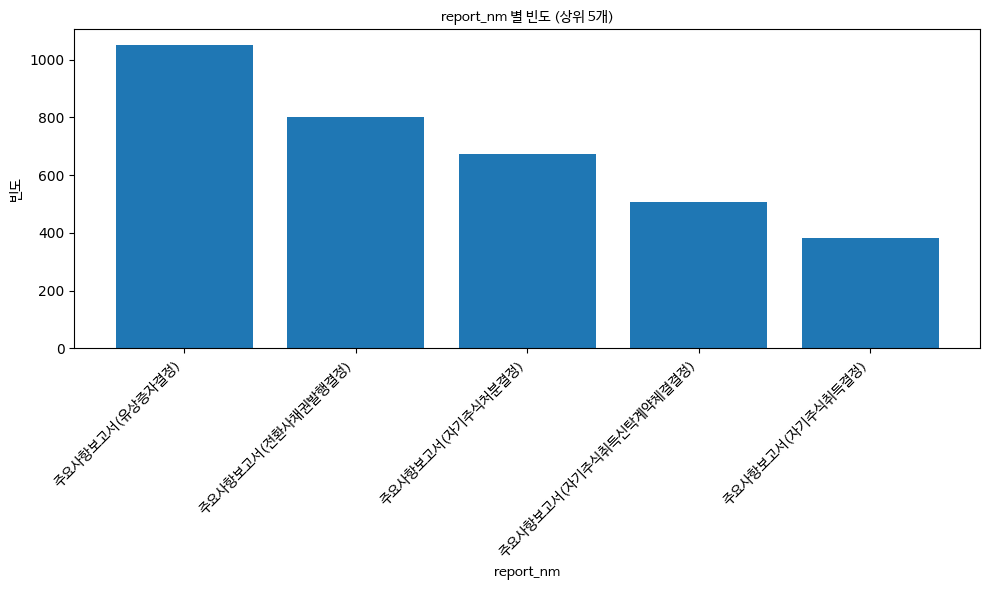

In [11]:
# prompt: disclosure DataFrame 사용: report_nm 별로 빈도를 그림으로 보여줘. 지금 구글 colab에서 사용중인데, 한글 폰트가 깨지지 않도록 보정해줘. "WARNING:matplotlib.font_manager:findfont: Font family 'NanumBarunGothic' not found."이 메세지가 안뜨게 해줘. 상위 5개만 보여줘
# 공시제목을 클렌징 한 것을 기준으로 다시 동일하게 빈도 그래프를 확인하기
# report_nm 별 빈도 계산
report_nm_counts = disclosure['report_nm_cleaned'].value_counts()

# 상위 5개만 선택
top_5_report_nm = report_nm_counts[:5]

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(top_5_report_nm.index, top_5_report_nm.values)
plt.xlabel('report_nm', fontproperties=font)
plt.ylabel('빈도', fontproperties=font)
plt.title('report_nm 별 빈도 (상위 5개)', fontproperties=font)
plt.xticks(rotation=45, ha='right', fontproperties=font)  # x축 레이블 회전
plt.tight_layout()  # 레이블이 잘리지 않도록 조정
plt.show()

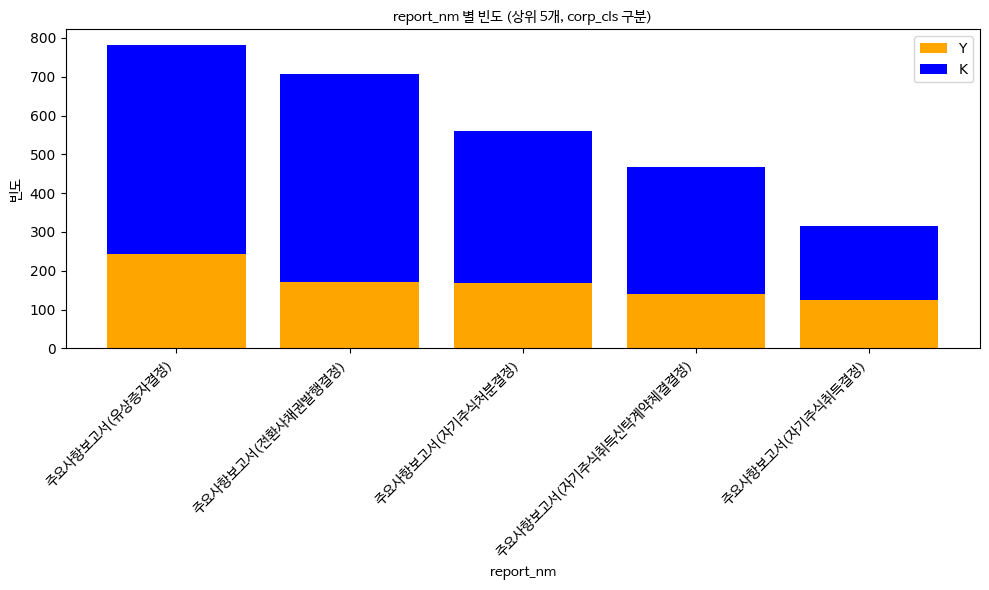

In [12]:
# prompt: 윗칸에서 만든 그림을 stacked로 색깔을 구분해서 보여주고 싶어. corp_cls 칼럼이 'Y"인 것은 주황색, 'K'인 것은 파란색으로 해줘. 'Y', 'K' 이외의 행은 빼줘.

# ... (Your existing code) ...

# corp_cls가 'Y' 또는 'K'인 행만 필터링
disclosure_filtered = disclosure[disclosure['corp_cls'].isin(['Y', 'K'])]

# corp_cls에 따라 색상 지정
colors = ['orange' if cls == 'Y' else 'blue' for cls in disclosure_filtered['corp_cls']]

# report_nm_cleaned 별 빈도 계산
report_nm_counts = disclosure_filtered['report_nm_cleaned'].value_counts()

# 상위 5개만 선택
top_5_report_nm = report_nm_counts[:5]

# 쌓인 막대 그래프 생성
plt.figure(figsize=(10, 6))

# 각 report_nm_cleaned에 대한 빈도를 쌓아서 그리기
bottom = [0] * len(top_5_report_nm)
for corp_cls in ['Y', 'K']:
  temp_df = disclosure_filtered[disclosure_filtered['corp_cls'] == corp_cls]
  report_nm_counts_cls = temp_df['report_nm_cleaned'].value_counts()
  report_nm_counts_cls = report_nm_counts_cls[report_nm_counts_cls.index.isin(top_5_report_nm.index)]
  plt.bar(top_5_report_nm.index, report_nm_counts_cls.values, label=corp_cls, bottom=bottom, color='orange' if corp_cls == 'Y' else 'blue')
  bottom = [b + v for b, v in zip(bottom, report_nm_counts_cls.values)]


plt.xlabel('report_nm', fontproperties=font)
plt.ylabel('빈도', fontproperties=font)
plt.title('report_nm 별 빈도 (상위 5개, corp_cls 구분)', fontproperties=font)
plt.xticks(rotation=45, ha='right', fontproperties=font)  # x축 레이블 회전
plt.legend()
plt.tight_layout()  # 레이블이 잘리지 않도록 조정
plt.show()

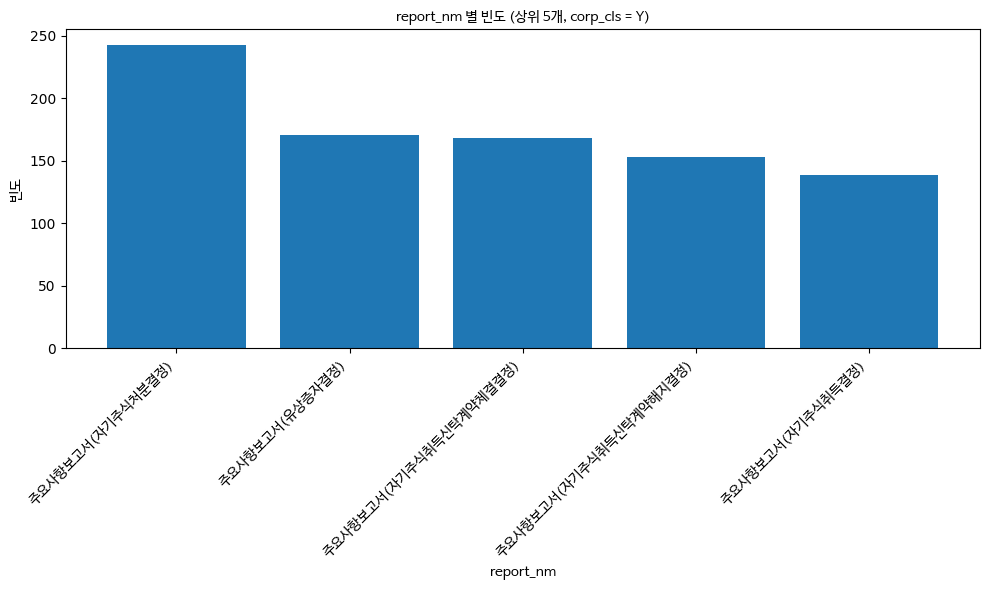

In [13]:
# prompt: 이번에는 'Y'만 대상으로 필터를 하여 그래프를 보고싶어.

# ... (Your existing code) ...

# corp_cls가 'Y'인 행만 필터링
disclosure_filtered = disclosure[disclosure['corp_cls'] == 'Y']

# report_nm_cleaned 별 빈도 계산
report_nm_counts = disclosure_filtered['report_nm_cleaned'].value_counts()

# 상위 5개만 선택
top_5_report_nm = report_nm_counts[:5]

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(top_5_report_nm.index, top_5_report_nm.values)
plt.xlabel('report_nm', fontproperties=font)
plt.ylabel('빈도', fontproperties=font)
plt.title('report_nm 별 빈도 (상위 5개, corp_cls = Y)', fontproperties=font)
plt.xticks(rotation=45, ha='right', fontproperties=font)  # x축 레이블 회전
plt.tight_layout()  # 레이블이 잘리지 않도록 조정
plt.show()

# 유가증권시장법인의 유상증자결정에 대한 분석수행

In [14]:
# prompt: 이제 corp_cls가 'Y'이면서, 'report_nm_cleaned'가 '주요사항보고서(유상증자결정)'인 데이터프레임을 남기려고 해

# corp_cls가 'Y'이면서 report_nm_cleaned가 '주요사항보고서(유상증자결정)'인 데이터프레임 필터링
target_df = disclosure[(disclosure['corp_cls'] == 'Y') & (disclosure['report_nm_cleaned'] == '주요사항보고서(유상증자결정)')]

# 결과 출력 (필요에 따라 출력 방식 변경)
target_df.head()

,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm,report_nm_cleaned
2,00125974,삼부토건,001470,Y,주요사항보고서(유상증자결정),20220331003549,삼부토건,20220331,,주요사항보고서(유상증자결정)
7,00652423,인바이오젠,101140,Y,[기재정정]주요사항보고서(유상증자결정),20220331002692,인바이오젠,20220331,,주요사항보고서(유상증자결정)
102,00585219,세원이앤씨,091090,Y,[기재정정]주요사항보고서(유상증자결정),20220323000740,세원이앤씨,20220323,,주요사항보고서(유상증자결정)
107,00469799,이엔플러스,074610,Y,[기재정정]주요사항보고서(유상증자결정),20220322000796,이엔플러스,20220322,,주요사항보고서(유상증자결정)
143,00156859,다올투자증권,030210,Y,주요사항보고서(유상증자결정),20220317000806,다올투자증권,20220317,,주요사항보고서(유상증자결정)


### DART API로 주요사항보고서 내용을 받아오기

In [15]:
# prompt: target_df에서 stock_code의 unique값을 남겨서 리스트로 만들어줘.

stock_code_list = target_df['stock_code'].unique().tolist()

In [16]:
len(stock_code_list)

111

In [34]:
# prompt: 만들어진 stock_code_list를 이용하여 loop을 통해 dart.event(stock_code, '유상증자') 함수를 실행하고 반환되는 데이터프레임을 합친다.

# stock_code_list를 이용하여 loop을 통해 dart.event(stock_code, '유상증자') 함수를 실행하고 반환되는 데이터프레임을 합친다.
df_event_list = pd.DataFrame()
for stock_code in stock_code_list:
    try:
        df_event = dart.event(stock_code, '유상증자', start = '20220101', end = '20231231')
        if df_event is not None:
            df_event_list = pd.concat([df_event_list, df_event], ignore_index=True)
        sleep(0.1)  # API 호출 제한을 피하기 위해 0.5초 대기
    except Exception as e:
        print(f"Error processing stock code {stock_code}: {e}")

{'status': '013', 'message': '조회된 데이타가 없습니다.'}
{'status': '013', 'message': '조회된 데이타가 없습니다.'}
{'status': '013', 'message': '조회된 데이타가 없습니다.'}
{'status': '013', 'message': '조회된 데이타가 없습니다.'}
{'status': '013', 'message': '조회된 데이타가 없습니다.'}
{'status': '013', 'message': '조회된 데이타가 없습니다.'}
{'status': '013', 'message': '조회된 데이타가 없습니다.'}
{'status': '013', 'message': '조회된 데이타가 없습니다.'}
{'status': '013', 'message': '조회된 데이타가 없습니다.'}


In [35]:
# 결과 확인
df_event_list.head()

,rcept_no,corp_cls,corp_code,corp_name,nstk_ostk_cnt,nstk_estk_cnt,fv_ps,bfic_tisstk_ostk,bfic_tisstk_estk,fdpp_fclt,fdpp_bsninh,fdpp_op,fdpp_dtrp,fdpp_ocsa,fdpp_etc,ic_mthn,ssl_at,ssl_bgd,ssl_edd
0,20220331003549,Y,00125974,삼부토건,"116,106",-,"1,000","172,556,269",-,-,-,-,-,-,-,제3자배정증자,N,-,-
1,20230627000103,Y,00125974,삼부토건,"6,585,879",-,"1,000","197,673,375",-,-,-,"24,999,996,684",-,-,-,제3자배정증자,N,-,-
2,20230428000628,Y,00652423,인바이오젠,-,-,-,-,-,-,-,-,-,-,-,제3자배정증자,N,-,-
3,20221110000434,Y,00652423,인바이오젠,"14,234,876",-,500,"53,396,820","24,019,836",-,-,"4,000,000,468","8,000,000,000",-,-,제3자배정증자,N,-,-
4,20240620000409,Y,00585219,세원이앤씨,"9,574,468",-,500,"43,180,255",-,-,-,"8,999,999,920",-,-,-,제3자배정증자,N,-,-


In [36]:
# prompt: df_event_list DataFrame 사용: fdpp_fclt	자금조달의 목적(시설자금 (원))	9,999,999,999
# fdpp_bsninh	자금조달의 목적(영업양수자금 (원))	9,999,999,999
# fdpp_op	자금조달의 목적(운영자금 (원))	9,999,999,999
# fdpp_dtrp	자금조달의 목적(채무상환자금 (원))	9,999,999,999
# fdpp_ocsa	자금조달의 목적(타법인 증권 취득자금 (원))	9,999,999,999
# fdpp_etc	자금조달의 목적(기타자금 (원))	9,999,999,999
# 위에 매칭처럼 칼럼명을 수정해줘. 대신에 "자금조달의 목적( '칼럼명' (원))"의 구성에서 '칼럼명'을 새 칼럼명으로 할거야

# Rename columns based on the provided mapping
new_column_names = {
    "fdpp_fclt": "시설자금",
    "fdpp_bsninh": "영업양수자금",
    "fdpp_op": "운영자금",
    "fdpp_dtrp": "채무상환자금",
    "fdpp_ocsa": "타법인 증권 취득자금",
    "fdpp_etc": "기타자금",
    "ic_mthn" : "증자방식"
}

df_event_list.rename(columns=new_column_names, inplace=True)

In [ ]:
# prompt: nstk_ostk_cnt / bfic_tisstk_ostk 를 계산해서 '보통주 발행비율'이라는 칼럼을, nstk_estk_cnt/bfic_tisstk_estk을 계산해서 "기타주식 발행비율'이라는 칼럼을 만들어줘. 현재 모든 칼럼은 str 형태니까, 에러가 안나도록 숫자로 변환해서 수행해줘.

# 'nstk_ostk_cnt'와 'bfic_tisstk_ostk' 칼럼을 숫자로 변환하고 '보통주 발행비율' 칼럼을 계산합니다.
# 'nstk_estk_cnt'와 'bfic_tisstk_estk' 칼럼을 숫자로 변환하고 '기타주식 발행비율' 칼럼을 계산합니다.
# NaN 값이 발생할 수 있으므로 try-except 블록으로 에러 처리를 합니다.

df_event_list['보통주 발행비율'] = None
df_event_list['기타주식 발행비율'] = None

for index, row in df_event_list.iterrows():
  try:
    nstk_ostk_cnt = float(row['nstk_ostk_cnt'].replace(',','')) if row['nstk_ostk_cnt'] else 0
    bfic_tisstk_ostk = float(row['bfic_tisstk_ostk'].replace(',','')) if row['bfic_tisstk_ostk'] else 1  # 0으로 나누는 것을 방지하기 위해 1로 설정
    if bfic_tisstk_ostk != 0:
      df_event_list.loc[index, '보통주 발행비율'] = nstk_ostk_cnt / bfic_tisstk_ostk

    nstk_estk_cnt = float(row['nstk_estk_cnt'].replace(',','')) if row['nstk_estk_cnt'] else 0
    bfic_tisstk_estk = float(row['bfic_tisstk_estk'].replace(',','')) if row['bfic_tisstk_estk'] else 1  # 0으로 나누는 것을 방지하기 위해 1로 설정
    if bfic_tisstk_estk != 0:
      df_event_list.loc[index, '기타주식 발행비율'] = nstk_estk_cnt / bfic_tisstk_estk

  except (ValueError, TypeError):
    pass  # 숫자로 변환할 수 없는 경우 무시합니다.

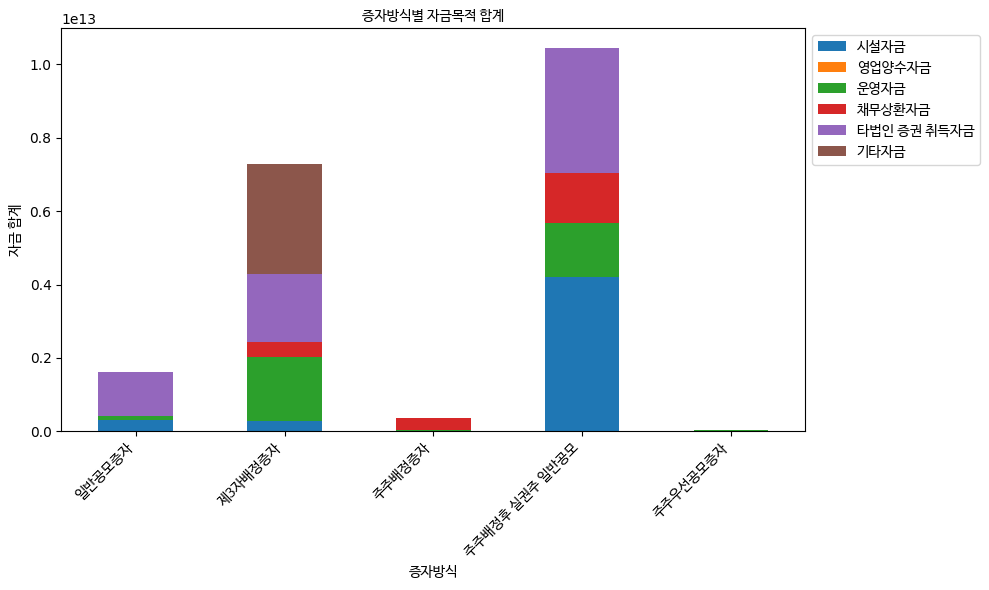

In [48]:
# prompt: df_event_list 데이터프레임을 바탕으로 시각화를 하려고 해. '증자방식'을 x축 값으로 두고, 시설자금, 영업양수자금, 운영자금, 채무상환자금, 타법인증권취득자, 기타자금의 합계를 y축으로 하는 barchart를 그리되, 자금목적을 stack 해서 보여줘. 색깔은 자금목적별로 다른 색깔로 해줘. 현재 자금목적 칼럼은 str 타입이야. 그래서 replace로 ','를 ''바꾸고 float형태로 바꿔야 함을 명심해

# 자금목적 칼럼을 숫자로 변환 (',' 제거 후 float 형태로 변환)
#for column in ['시설자금', '영업양수자금', '운영자금', '채무상환자금', '타법인 증권 취득자금', '기타자금']:
#  df_event_list[column] = df_event_list[column].apply(lambda x: float(str(x).replace(',', '')) if pd.notna(x) else 0)

# 증자방식을 x축으로, 자금목적 합계를 y축으로 하는 stacked bar chart 생성
df_event_list.groupby('증자방식')[['시설자금', '영업양수자금', '운영자금', '채무상환자금', '타법인 증권 취득자금', '기타자금']].sum().plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('증자방식', fontproperties=font)
plt.ylabel('자금 합계', fontproperties=font)
plt.title('증자방식별 자금목적 합계', fontproperties=font)
plt.xticks(rotation=45, ha='right', fontproperties=font)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop = font)
plt.tight_layout()
plt.show()

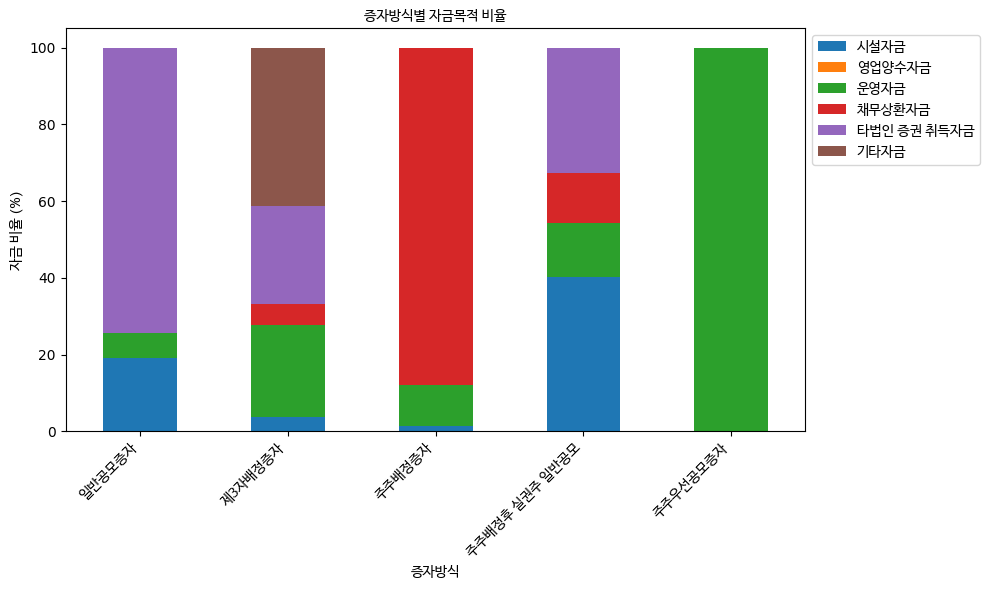

In [49]:
# prompt: 위에서 그린 그림의 코드를 이번에는 이렇게 바꿔줘: y축이 금액이 되는게 아니라, 비율이되어야 해. 100%안에서 비율.

# ... (Your existing code) ...

# 증자방식을 x축으로, 자금목적 비율을 y축으로 하는 stacked bar chart 생성
df_funding_by_method = df_event_list.groupby('증자방식')[['시설자금', '영업양수자금', '운영자금', '채무상환자금', '타법인 증권 취득자금', '기타자금']].sum()
total_funding = df_funding_by_method.sum(axis=1)
funding_ratio = df_funding_by_method.div(total_funding, axis=0) * 100

funding_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('증자방식', fontproperties=font)
plt.ylabel('자금 비율 (%)', fontproperties=font)
plt.title('증자방식별 자금목적 비율', fontproperties=font)
plt.xticks(rotation=45, ha='right', fontproperties=font)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop = font)
plt.tight_layout()
plt.show()

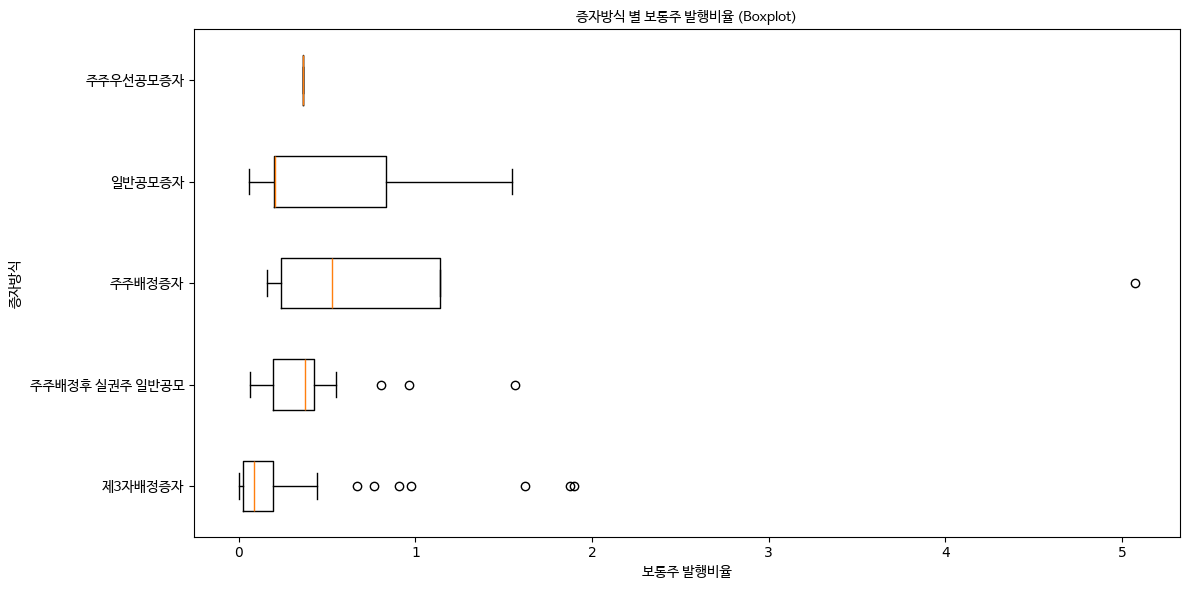

In [56]:
# prompt: 이번에는 증자방식(y축) vs 보통주 발행비율(x축)을 가로로 누운 boxplot으로 그리려고 해. y축의 값들도 fontproperties=font를 적용하고 싶어

# ... (Your existing code) ...

# '증자방식' 별 '보통주 발행비율' boxplot 생성
plt.figure(figsize=(12, 6))
plt.boxplot([df_event_list[df_event_list['증자방식'] == method]['보통주 발행비율'].dropna() for method in df_event_list['증자방식'].unique()],
            vert=False, labels=df_event_list['증자방식'].unique())
plt.xlabel('보통주 발행비율', fontproperties=font)
plt.ylabel('증자방식', fontproperties=font)
plt.title('증자방식 별 보통주 발행비율 (Boxplot)', fontproperties=font)

# y축 눈금 레이블에 fontproperties 적용
plt.yticks(fontproperties=font)

plt.tight_layout()
plt.show()

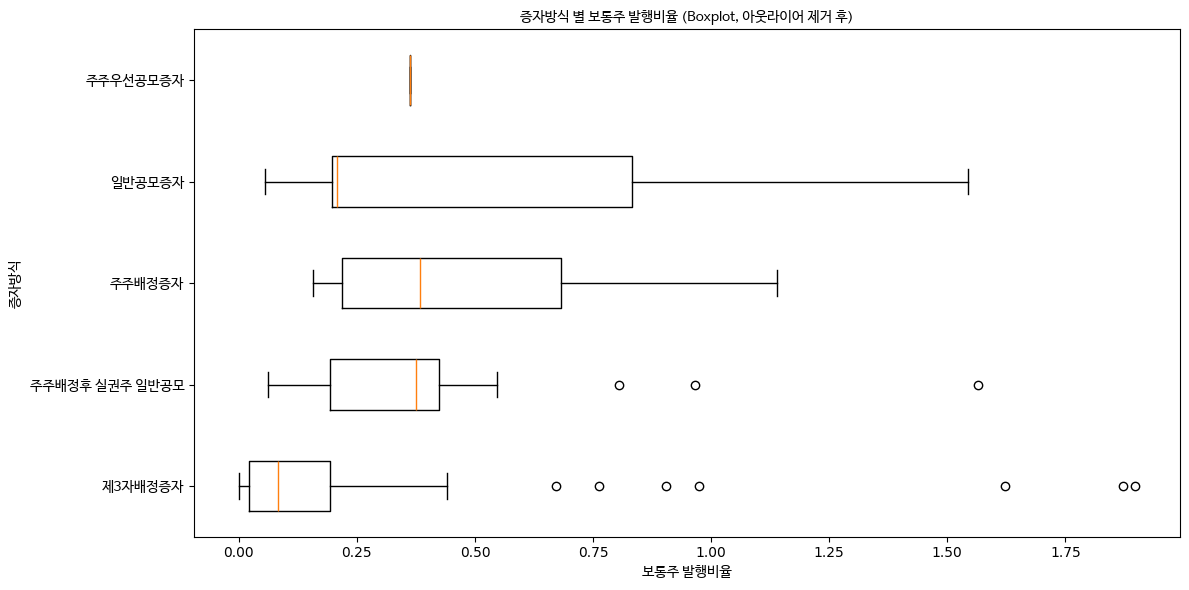

In [57]:
# prompt: 이번에는 보통주 발행비율이 2를 넘는 아웃라이어는 제거한 다음 다시 그림을 그리고 싶어

# ... (Your existing code) ...

# '보통주 발행비율'이 2를 넘는 행 제거
df_event_list_filtered = df_event_list[df_event_list['보통주 발행비율'] <= 2]

# '증자방식' 별 '보통주 발행비율' boxplot 생성 (아웃라이어 제거 후)
plt.figure(figsize=(12, 6))
plt.boxplot([df_event_list_filtered[df_event_list_filtered['증자방식'] == method]['보통주 발행비율'].dropna() for method in df_event_list_filtered['증자방식'].unique()],
            vert=False, labels=df_event_list_filtered['증자방식'].unique())
plt.xlabel('보통주 발행비율', fontproperties=font)
plt.ylabel('증자방식', fontproperties=font)
plt.title('증자방식 별 보통주 발행비율 (Boxplot, 아웃라이어 제거 후)', fontproperties=font)

# y축 눈금 레이블에 fontproperties 적용
plt.yticks(fontproperties=font)

plt.tight_layout()
plt.show()

# ... (Your existing code) ...

In [58]:
#DART공시의 URL특징은 다음과 같다 : 앞부분은 같고, 뒷부분은 rcept_no만 바뀐다
#따라서 먼저 앞부분은 고정으로 만들고, rcept_no를 붙여서 'URL'이라는 칼럼을 만든다
url_front = 'https://dart.fss.or.kr/dsaf001/main.do?rcpNo='
df_event_list_filtered['URL'] = url_front + df_event_list_filtered['rcept_no']

<ipython-input-58-b29abb4ed750>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_list_filtered['URL'] = url_front + df_event_list_filtered['rcept_no']


In [62]:
# 사례를 알아보기 위한 것임
# 증자방식이 제3자배정이면서, 보통주 발행비율이 1을 넘는 것을 필터하여 show한다
df_event_list_filtered_show = df_event_list_filtered[(df_event_list_filtered['증자방식'] == '제3자배정증자')& (df_event_list_filtered['보통주 발행비율']>1)]
df_event_list_filtered_show[['corp_name','URL']].iloc[2,1]

'https://dart.fss.or.kr/dsaf001/main.do?rcpNo=20230726000510'

# 유가증권시장법인의 자기주식처분결정에 대한 분석수행

In [14]:
# prompt: 이제 corp_cls가 'Y'이면서, 'report_nm_cleaned'가 '주요사항보고서(자기주식처분결정)'인 데이터프레임을 남기려고 해

# corp_cls가 'Y'이면서 report_nm_cleaned가 '주요사항보고서(자기주식처분결정)'인 데이터프레임 필터링
target_df = disclosure[(disclosure['corp_cls'] == 'Y') & (disclosure['report_nm_cleaned'] == '주요사항보고서(자기주식처분결정)')]

# 결과 출력 (필요에 따라 출력 방식 변경)
target_df.head()

,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm,report_nm_cleaned
0,00631518,SK이노베이션,096770,Y,주요사항보고서(자기주식처분결정),20220331003581,SK이노베이션,20220331,,주요사항보고서(자기주식처분결정)
30,00911955,잇츠한불,226320,Y,[기재정정]주요사항보고서(자기주식처분결정),20220330001136,잇츠한불,20220330,,주요사항보고서(자기주식처분결정)
35,00181712,SK,034730,Y,주요사항보고서(자기주식처분결정),20220329001239,SK,20220329,,주요사항보고서(자기주식처분결정)
45,00258801,카카오,035720,Y,주요사항보고서(자기주식처분결정),20220329000299,카카오,20220329,,주요사항보고서(자기주식처분결정)
50,01386916,SK아이이테크놀로지,361610,Y,주요사항보고서(자기주식처분결정),20220328000921,SK아이이테크놀로지,20220328,,주요사항보고서(자기주식처분결정)


### DART API로 주요사항보고서 내용을 받아오기

In [15]:
# prompt: target_df에서 stock_code의 unique값을 남겨서 리스트로 만들어줘.

stock_code_list = target_df['stock_code'].unique().tolist()

len(stock_code_list)

104

In [16]:
# prompt: 만들어진 stock_code_list를 이용하여 loop을 통해 dart.event(stock_code, '자기주식처분') 함수를 실행하고 반환되는 데이터프레임을 합친다.

# stock_code_list를 이용하여 loop을 통해 dart.event(stock_code, '자기주식처분') 함수를 실행하고 반환되는 데이터프레임을 합친다.
df_event_list = pd.DataFrame()
for stock_code in stock_code_list:
    try:
        df_event = dart.event(stock_code, '자기주식처분', start = '20220101', end = '20231231')
        if df_event is not None:
            df_event_list = pd.concat([df_event_list, df_event], ignore_index=True)
        sleep(0.1)  # API 호출 제한을 피하기 위해 0.5초 대기
    except Exception as e:
        print(f"Error processing stock code {stock_code}: {e}")

{'status': '013', 'message': '조회된 데이타가 없습니다.'}
{'status': '013', 'message': '조회된 데이타가 없습니다.'}


In [17]:
# prompt: df_event_list의 칼럼을 수정하려고 해. 아래 매칭한것처럼 바꿔줘.
# dppln_stk_ostk	처분예정_보통주식
# dppln_stk_estk	처분예정_기타주식
# dpstk_prc_ostk	처분가격_보통주식
# dpstk_prc_estk	처분가격_기타주식
# dppln_prc_ostk	처분금액_보통주식
# dppln_prc_estk	처분금액_기타주식
# dp_pp	처분목적	처분목적
# dp_m_mkt	시장을 통한 매도
# dp_m_ovtm	시간외대량매매
# dp_m_otc	장외처분
# dp_m_etc	기타처분
# aq_wtn_div_ostk	보유현황_배당가능이익_취득_보통주식
# aq_wtn_div_ostk_rt	보유비율_배당가능이익_취득_보통주식
# aq_wtn_div_estk	보유현황_배당가능이익_취득_기타주식
# aq_wtn_div_estk_rt	보유비율_배당가능이익_취득_기타주식
# eaq_ostk	보유현황_기타취득_보통주식
# eaq_ostk_rt	보유비율_기타취득_보통주식
# eaq_estk	보유현황_기타취득_기타주식
# eaq_estk_rt	보유비율_기타취득_기타주식
# dp_dd 	처분결정일

new_column_names = {
    'dppln_stk_ostk': '처분예정_보통주식',
    'dppln_stk_estk': '처분예정_기타주식',
    'dpstk_prc_ostk': '처분가격_보통주식',
    'dpstk_prc_estk': '처분가격_기타주식',
    'dppln_prc_ostk': '처분금액_보통주식',
    'dppln_prc_estk': '처분금액_기타주식',
    'dp_pp': '처분목적',
    'dp_m_mkt': '시장매도',
    'dp_m_ovtm': '시간외대량매매',
    'dp_m_otc': '장외처분',
    'dp_m_etc': '기타처분',
    'aq_wtn_div_ostk': '보유현황_배당가능이익_취득_보통주식',
    'aq_wtn_div_ostk_rt': '보유비율_배당가능이익_취득_보통주식',
    'aq_wtn_div_estk': '보유현황_배당가능이익_취득_기타주식',
    'aq_wtn_div_estk_rt': '보유비율_배당가능이익_취득_기타주식',
    'eaq_ostk': '보유현황_기타취득_보통주식',
    'eaq_ostk_rt': '보유비율_기타취득_보통주식',
    'eaq_estk': '보유현황_기타취득_기타주식',
    'eaq_estk_rt': '보유비율_기타취득_기타주식',
    'dp_dd': '처분결정일'
}

df_event_list.rename(columns=new_column_names, inplace=True)

In [19]:
# prompt: '처분결정일'칼럼의 경우, 기재방식이 YYYY년MM월DD일 또는 YYYY.MM.DD 형태야. 둘을 한가지 방식으로 통일하고 싶어.


def convert_date_format(date_str):
    """'YYYY년MM월DD일' 또는 'YYYY.MM.DD' 형태의 문자열을 'YYYY-MM-DD' 형태로 변환합니다."""
    try:
        if '년' in date_str:
            return datetime.strptime(date_str, '%Y년 %m월 %d일').strftime('%Y-%m-%d')
        else:
            return datetime.strptime(date_str, '%Y.%m.%d').strftime('%Y-%m-%d')
    except ValueError:
        return None  # 변환할 수 없는 경우 None 반환

# '처분결정일' 칼럼의 값을 변환합니다.
df_event_list['처분결정일_new'] = df_event_list['처분결정일'].apply(convert_date_format)



In [23]:
# 텍스트 형태의 데이터를 숫자로 변환
import numpy as np

df_event_list['처분예정_보통주식_n'] = np.where(df_event_list['처분예정_보통주식'].notnull(), df_event_list['처분예정_보통주식'].str.replace(',', '').str.replace('-', '0').astype(float), 0)
df_event_list['시장매도_n'] = np.where(df_event_list['시장매도'].notnull(), df_event_list['시장매도'].str.replace(',', '').str.replace('-', '0').astype(float), 0)
df_event_list['시간외대량매매_n'] = np.where(df_event_list['시간외대량매매'].notnull(), df_event_list['시간외대량매매'].str.replace(',', '').str.replace('-', '0').astype(float), 0)
df_event_list['장외처분_n'] = np.where(df_event_list['장외처분'].notnull(), df_event_list['장외처분'].str.replace(',', '').str.replace('-', '0').astype(float), 0)
df_event_list['기타처분_n'] = np.where(df_event_list['기타처분'].notnull(), df_event_list['기타처분'].str.replace(',', '').str.replace('-', '0').astype(float), 0)

In [29]:
# 필요한 비율을 계산하여 새로운 칼럼으로 추가

df_event_list['자기주식처분비율'] = None
df_event_list['자기주식처분비율_범위내'] = None
df_event_list['보통주only이벤트'] = None


for index, row in df_event_list.iterrows():
  try:
    처분예정_보통주식 = float(row['처분예정_보통주식'].replace(',','').replace('-','0')) if row['처분예정_보통주식'] else 0
    보유현황_배당가능이익_취득_보통주식 = float(row['보유현황_배당가능이익_취득_보통주식'].replace(',','').replace('-','0')) if row['보유현황_배당가능이익_취득_보통주식'] else 0
    보유현황_기타취득_보통주식 = float(row['보유현황_기타취득_보통주식'].replace(',','').replace('-','0')) if row['보유현황_기타취득_보통주식'] else 0
    if (보유현황_배당가능이익_취득_보통주식+보유현황_기타취득_보통주식) != 0:
      df_event_list.loc[index, '자기주식처분비율'] = 처분예정_보통주식 / (보유현황_배당가능이익_취득_보통주식+보유현황_기타취득_보통주식)
    if 보유현황_배당가능이익_취득_보통주식 != 0:
      df_event_list.loc[index, '자기주식처분비율_범위내'] = 처분예정_보통주식 / 보유현황_배당가능이익_취득_보통주식
    if 보유현황_배당가능이익_취득_보통주식 >0 and 보유현황_기타취득_보통주식 == 0:
      df_event_list.loc[index, '보통주only이벤트'] = 'Y'
    else :
      df_event_list.loc[index, '보통주only이벤트'] = 'N'


  except (ValueError, TypeError):
    pass  # 숫자로 변환할 수 없는 경우 무시합니다.

df_event_list.head()

,rcept_no,corp_cls,corp_code,corp_name,od_a_at_t,od_a_at_b,adt_a_atn,cs_iv_bk,보유현황_배당가능이익_취득_보통주식,보유비율_배당가능이익_취득_보통주식,...,d1_slodlm_estk,처분결정일_new,처분예정_보통주식_n,시장매도_n,시간외대량매매_n,장외처분_n,기타처분_n,자기주식처분비율,자기주식처분비율_범위내,보통주only이벤트
0,20220207000348,Y,00631518,SK이노베이션,5,-,-,하나은행(Hana Bank),"9,146,219",9.8,...,-,2022-02-07,852448.0,0.0,0.0,0.0,852448.0,0.088178,0.093202,N
1,20220331003581,Y,00631518,SK이노베이션,5,-,-,SK증권,"9,146,219",9.8,...,-,2022-03-31,9443.0,0.0,0.0,0.0,9443.0,0.000977,0.001032,N
2,20220427000714,Y,00631518,SK이노베이션,5,-,-,SK증권,"8,284,447",8.96,...,-,2022-04-27,1626.0,0.0,0.0,0.0,1626.0,0.000185,0.000196,N
3,20220928000529,Y,00631518,SK이노베이션,5,-,-,SK증권,"8,282,821",8.96,...,-,2022-09-28,558510.0,0.0,0.0,0.0,558510.0,0.063439,0.06743,N
4,20230206000358,Y,00631518,SK이노베이션,5,-,-,하나은행(Hana Bank),"7,724,911",8.3,...,-,2023-02-06,2799970.0,0.0,0.0,0.0,2799970.0,0.339554,0.36246,N


In [31]:
# 필요한 데이터 행만 남겨놓기
# 보통주only이벤트 칼럼이 "Y"인것만 남김
df_event_list2 = df_event_list[df_event_list['보통주only이벤트'] == 'Y']

In [36]:
# prompt:  '시장매도_n', '시간외대량매매_n', '장외처분_n', '기타처분_n'별로 다 더하고, '처분예정_보통주식_n'을 다 더한값을 분모로 하여, 처분방식별 비율을 표로 보여줘

# 처분방식별 합계 계산
total_disposed = df_event_list2[['시장매도_n', '시간외대량매매_n', '장외처분_n', '기타처분_n']].sum()
total_planned = df_event_list2['처분예정_보통주식_n'].sum()

# 처분방식별 비율 계산
disposal_ratios = (total_disposed / total_planned) * 100

# 결과를 데이터프레임으로 변환
disposal_ratios_df = pd.DataFrame({'처분방식': disposal_ratios.index, '비율': disposal_ratios.values})

# 표 형태로 출력
disposal_ratios_df

,처분방식,비율
0,시장매도_n,0.543549
1,시간외대량매매_n,16.176510
2,장외처분_n,44.276887
3,기타처분_n,39.540693


In [39]:
print(df_event_list2.처분목적.to_list())

['경영층 주식보상', '사외이사와 주주의 이해관계 일치 강화를 위해 자기주식을 활용한 Stock Grant 부여', '사외이사-주주 이해관계 일치 강화를 위해 자기주식을 활용한 Stock Grant 부여', '직원에 대한 상여금, 장려금 등으로 자기주식을 지급', '우리사주조합에 매각', '우리사주조합에 매각', '주식매수선택권 행사에 따른 자기주식 교부', '임직원 이익배당급 지급\n(희망자에 한해서 이익배당급 중 일부를 현금대신 자사주로 지급\n하기 위함임)', '우리사주조합에 자기주식 출연', '포스코홀딩스 및 사업회사 \n임원에 대한 주식보상', '자기주식 상여 지급', '자기주식 상여 지급', '자기주식 상여 지급', '자기주식 상여 지급', '임직원에 대한\n자기주식 상여 지급', '임직원에 대한\n자기주식 상여 지급', '자기주식을 교환대상으로 하는\n교환사채 발행에 따른 처분', '임직원 및 사외이사에 대한\n자기주식 상여 지급', '임직원에 대한\n자기주식 상여 지급', '임직원 성과급 지급', '임직원 성과급 이연지급', '임직원 성과급 지급', '우리사주제도(ESOP)에 의한 \n임직원 자사주 출연', '임직원 성과급 이연지급', '성과보상 이연 지급 대상자에 대한 자기주식 교부', '퇴직 임원의 이연 성과보상에 대한 기한 도래분 지급', '                                 임원 지급', '내부 조직원 포상 \n(2021년 교학상장 AWARD)자사주 지급 ', '1)기업가치 제고를 위한 마케팅활동\n2)2021년 우수구성원 영업성과에 대한   포상', '장기근속 우수구성원  포상', '2022년 교학상장 AWARD 조직원 포상', '2022년 우수구성원 영업성과에 대한 \n포상', '2023년 교학상장 Award 근속포상', '자기주식을 교환대상으로 하는 사모 교환사채의 발행', '연봉계약에 명시된 스톡그랜트 부여', '연봉계약에 명시된 스톡그랜트 부여', '무상증자시 취득한 단수주의 처분', '종업원에 대한 상여

### "아래는 최근 2년간 상장사가 "자기주식 처분결정"공시에서 "처분의 목적"으로 기재한 내용들이야. 내용을 보고 적절하게 카테고리화하고, 각 카테고리별 빈도를 표 형태로 반환해" 프롬프트에 위에서 출력된 리스트를 붙여넣었고, GPT4에 돌림

In [41]:
# prompt: 카테고리	빈도
# 임직원 보상	58
# 우리사주조합 관련	18
# 자금 조달 및 재무 관리	9
# 주식매수선택권 행사	8
# 전략적 파트너십	5
# 교환사채 발행	4
# 기타	3
# 이걸 표로 만들어줘

import pandas as pd

data = {
    '카테고리': ['임직원 보상', '우리사주조합 관련', '자금 조달 및 재무 관리', '주식매수선택권 행사', '전략적 파트너십', '교환사채 발행', '기타'],
    '빈도': [58, 18, 9, 8, 5, 4, 3]
}

df = pd.DataFrame(data)
df

,카테고리,빈도
0,임직원 보상,58
1,우리사주조합 관련,18
2,자금 조달 및 재무 관리,9
3,주식매수선택권 행사,8
4,전략적 파트너십,5
5,교환사채 발행,4
6,기타,3


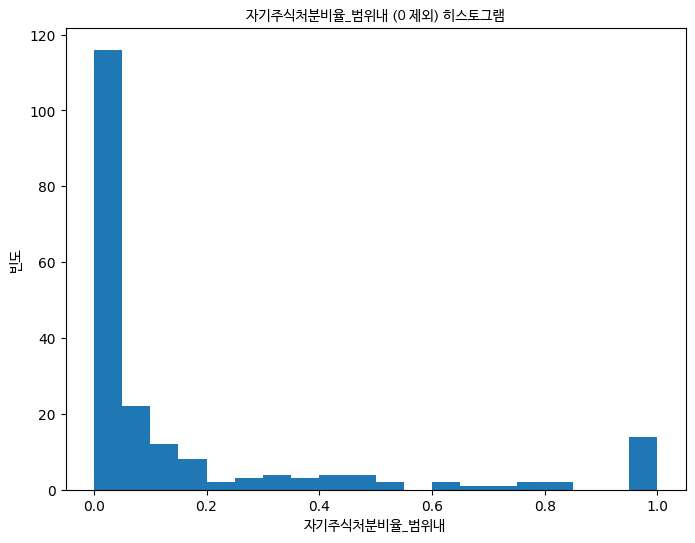

In [44]:
# prompt: "자기주식처분비율_범위내"칼럼에서 0을 제외한 값들의 분포를 히스토그램으로 보여줘. 단 히스토그램의 범위는 0~1로 해줘.

import matplotlib.pyplot as plt

# '자기주식처분비율_범위내' 칼럼에서 0을 제외한 값들의 분포를 히스토그램으로 보여줍니다.
# 히스토그램의 범위는 0~1로 설정합니다.

plt.figure(figsize=(8, 6))
plt.hist(df_event_list['자기주식처분비율_범위내'].dropna()[df_event_list['자기주식처분비율_범위내'] != 0], bins=20, range=(0, 1))
plt.xlabel('자기주식처분비율_범위내', fontproperties=font )
plt.ylabel('빈도', fontproperties=font)
plt.title('자기주식처분비율_범위내 (0 제외) 히스토그램', fontproperties=font)
plt.show()